## Problem Statement ( Kaggle Link <a href='https://www.kaggle.com/c/house-prices-advanced-regression-techniques'> here</a> )

### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Submission File Format
The file should contain a header and have the following format:

Id,SalePrice <br>
1461,169000.1 <br>
1462,187724.1233 <br>
1463,175221 <br>
etc.

## Solution

In [1]:
# remove warning throughout the notebook
import warnings
warnings.filterwarnings('ignore')

# packages for dataframe and data
import pandas as pd
import numpy as np

# packages for visualizations / eda
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly
import plotly.express as px
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode, plot,iplot
from plots.sns import PlotUtil
# packages for preprocessing
from preprocessing.memory import MemoryUtil
from preprocessing.nv import NVUtil
from preprocessing.label_encoder import LabelEncoder
from preprocessing.outlier import OutlierUtil
from preprocessing.scalar import ScalarUtil
#packages for feature selection
from feature_engineering import FeatureSelectionUtil

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
# Kaggle - house price advanced regression techniques
train_df = pd.read_csv(r"D:\sanooj\datascience\data\house-prices-advanced-regression-techniques\train.csv")
test_df = pd.read_csv(r"D:\sanooj\datascience\data\house-prices-advanced-regression-techniques\test.csv")

In [3]:
train_df.shape

(1460, 81)

### Pre Processing
#### Memory Optimization

In [4]:
train_df = MemoryUtil.memory_optimize(train_df)

Memory usage before optimization is: 0.90 MB
Memory usage after optimization is: 0.16 MB
Decreased by 81.7%


In [5]:
test_df = MemoryUtil.memory_optimize(test_df)

Memory usage before optimization is: 0.89 MB
Memory usage after optimization is: 0.16 MB
Decreased by 81.7%


#### Get to know each numeric column

In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.0,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,inf,10516.828082,6.099315,5.575342,1971.267808,1984.865753,inf,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.296875,9981.264932,1.382997,1.112799,30.202904,20.645407,inf,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.0,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.0,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.0,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Check for columns having null values and treat them

In [7]:
train_df.columns[train_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
excluded_columns_train,selected_columns_train,numerical_columns_train,categorical_columns_train,train_df = NVUtil.nv_treatment(train_df,30)


Before NV treatment the stats are as below
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Before NV treatment the stats are as below
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64


In [9]:
excluded_columns_train

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [10]:
excluded_columns_test,selected_columns_test,numerical_columns_test,categorical_columns_test,test_df = NVUtil.nv_treatment(test_df,30)


Before NV treatment the stats are as below
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
Before NV treatment the stats are as below
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64


In [11]:
excluded_columns_test

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

In [13]:
test_df.columns[test_df.isnull().any()]

Index([], dtype='object')

#### Label Encoding

In [14]:
train_df = LabelEncoder.encode(train_df,categorical_columns_train)

In [15]:
test_df = LabelEncoder.encode(test_df,categorical_columns_test)

#### Outlier Treatment

In [16]:
train_df = OutlierUtil.iqr_outlier_treatment(train_df,numerical_columns_train)


Before iqr outler treatment the stats are as below
                Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1460.000000  1460.000000  1460.000000   1460.00000    1460.000000   
mean    730.500000    56.897260     3.028767          inf   10516.828082   
std     421.610009    42.300571     0.632017     22.03125    9981.264932   
min       1.000000    20.000000     0.000000     21.00000    1300.000000   
25%     365.750000    20.000000     3.000000     60.00000    7553.500000   
50%     730.500000    50.000000     3.000000     69.00000    9478.500000   
75%    1095.250000    70.000000     3.000000     79.00000   11601.500000   
max    1460.000000   190.000000     4.000000    313.00000  215245.000000   

            Street     LotShape  LandContour    Utilities    LotConfig  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.995890     1.942466     2.777397     0.000685     3.019178  ...   
std       0.063996     1.4

In [17]:
test_df = OutlierUtil.iqr_outlier_treatment(test_df,numerical_columns_test)


Before iqr outler treatment the stats are as below
                Id   MSSubClass     MSZoning  LotFrontage       LotArea  \
count  1459.000000  1459.000000  1459.000000    1459.0000   1459.000000   
mean   2190.000000    57.378341     3.026731          inf   9819.161069   
std     421.321334    42.746880     0.683911      20.5625   4955.517327   
min    1461.000000    20.000000     0.000000      21.0000   1470.000000   
25%    1825.500000    20.000000     3.000000      60.0000   7391.000000   
50%    2190.000000    50.000000     3.000000      67.0000   9399.000000   
75%    2554.500000    70.000000     3.000000      78.0000  11517.500000   
max    2919.000000   190.000000     4.000000     200.0000  56600.000000   

            Street     LotShape  LandContour  Utilities    LotConfig  ...  \
count  1459.000000  1459.000000  1459.000000     1459.0  1459.000000  ...   
mean      0.995888     1.952707     2.776559        0.0     3.092529  ...   
std       0.064018     1.410751     0.701

### Visualizations

In [18]:
continous_vars = train_df.describe().columns
continous_vars

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

##### Let's check how normally disributed are the fields

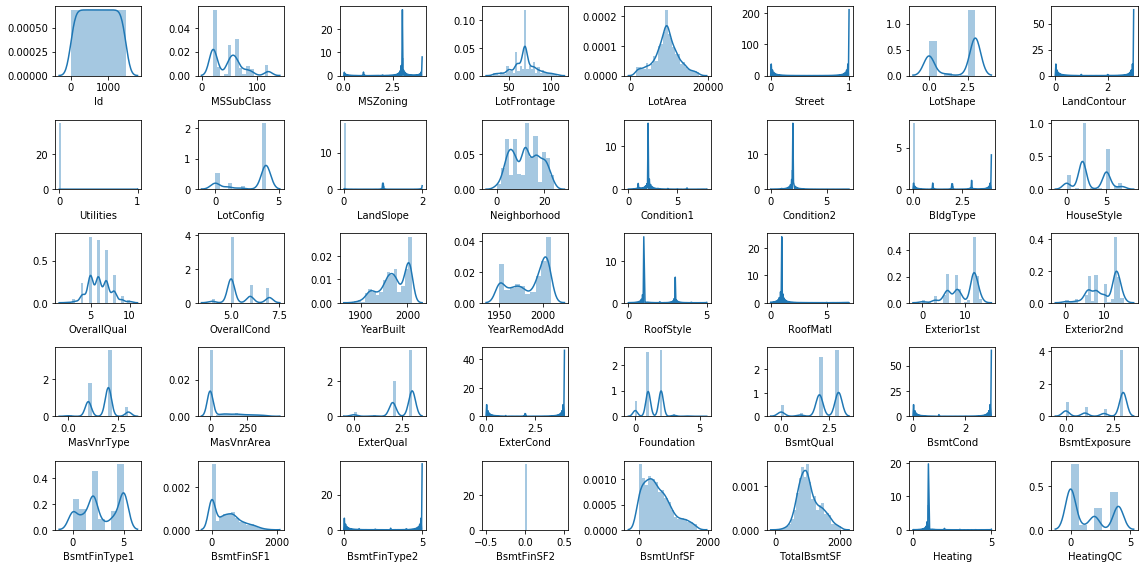

In [19]:
rows = 5
columns = 8
figsize = (16,8)
PlotUtil.draw_distribution_plot(rows,columns,train_df,figsize,continous_vars)

###### Plot Interpretation

Following plots looks decently normally disributed
- LotFrontage
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- KitchenAbvGr
- TotRmsAbvGrd
- GarageArea
- MoSold
- SalePrice

##### Let's check the scatter plots for these variables

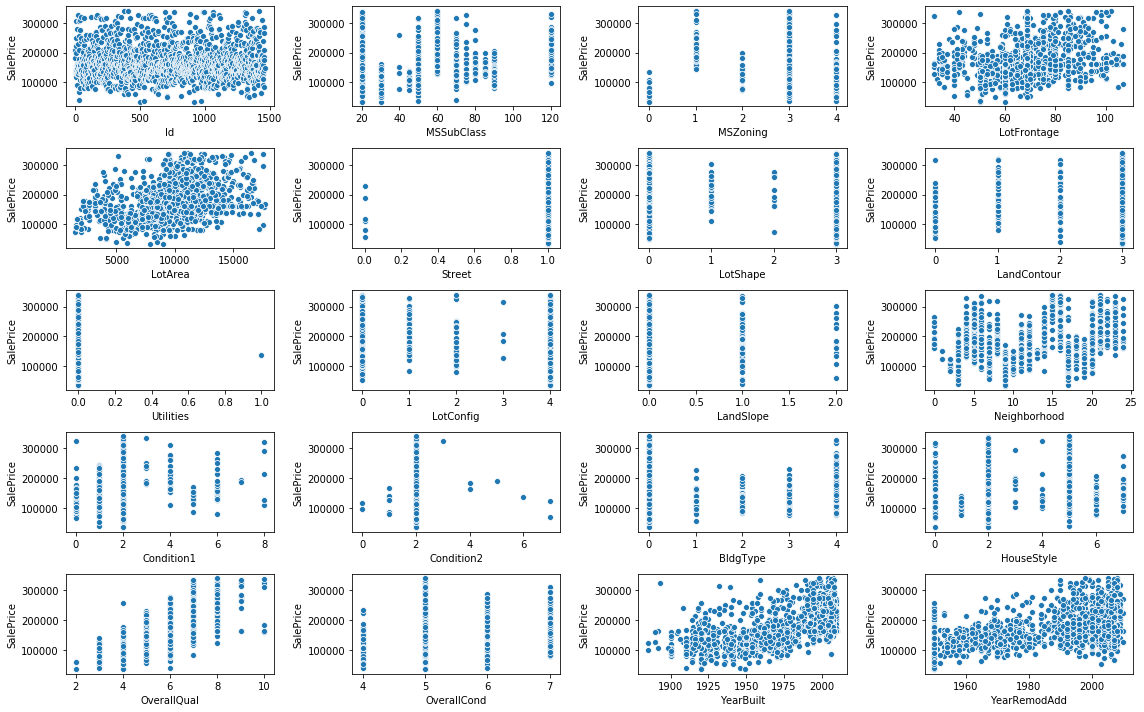

In [20]:
rows = 5
columns = 4
figsize = (16,10)
target_variable = 'SalePrice'
PlotUtil.draw_scatter_plot(rows,columns,train_df,target_variable,figsize,train_df.columns[0:20])

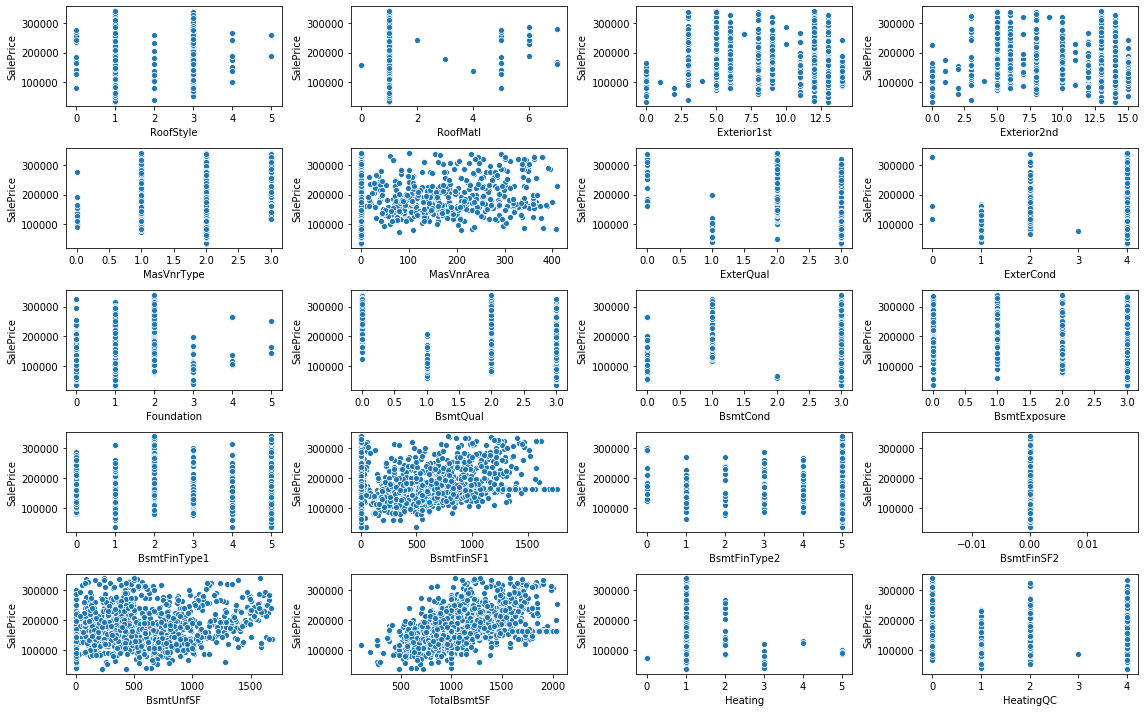

In [21]:
PlotUtil.draw_scatter_plot(rows,columns,train_df,target_variable,figsize,train_df.columns[20:40])

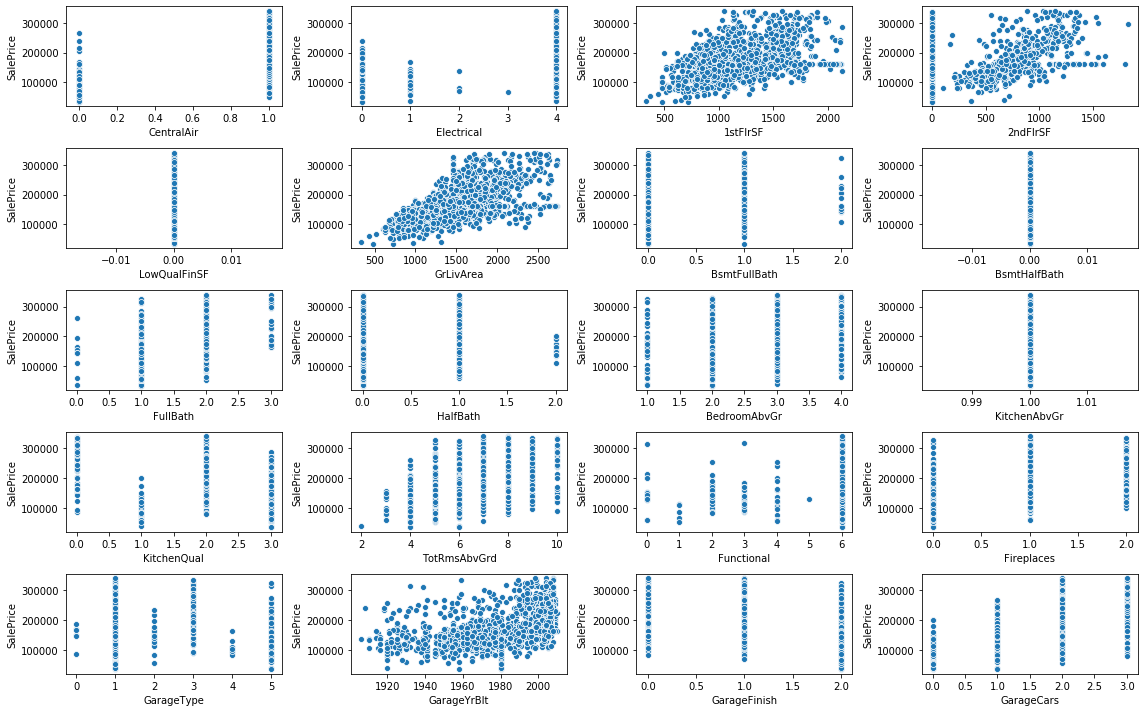

In [22]:
PlotUtil.draw_scatter_plot(rows,columns,train_df,target_variable,figsize,train_df.columns[40:60])

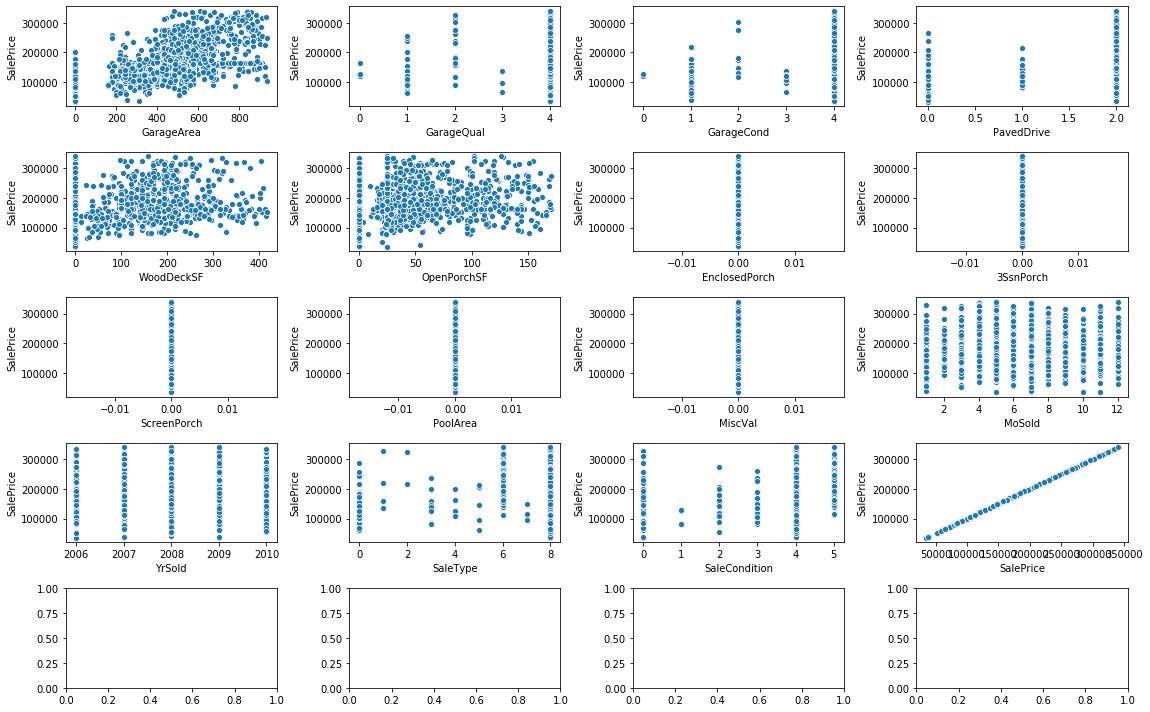

In [23]:
PlotUtil.draw_scatter_plot(rows,columns,train_df,target_variable,figsize,train_df.columns[60:80])

###### Plot Interpretation
Following features looks linearly related

- LotFrontage
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- GarageYrBlt
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedProch
- ScreenPorch

##### Let's check the correlation plot

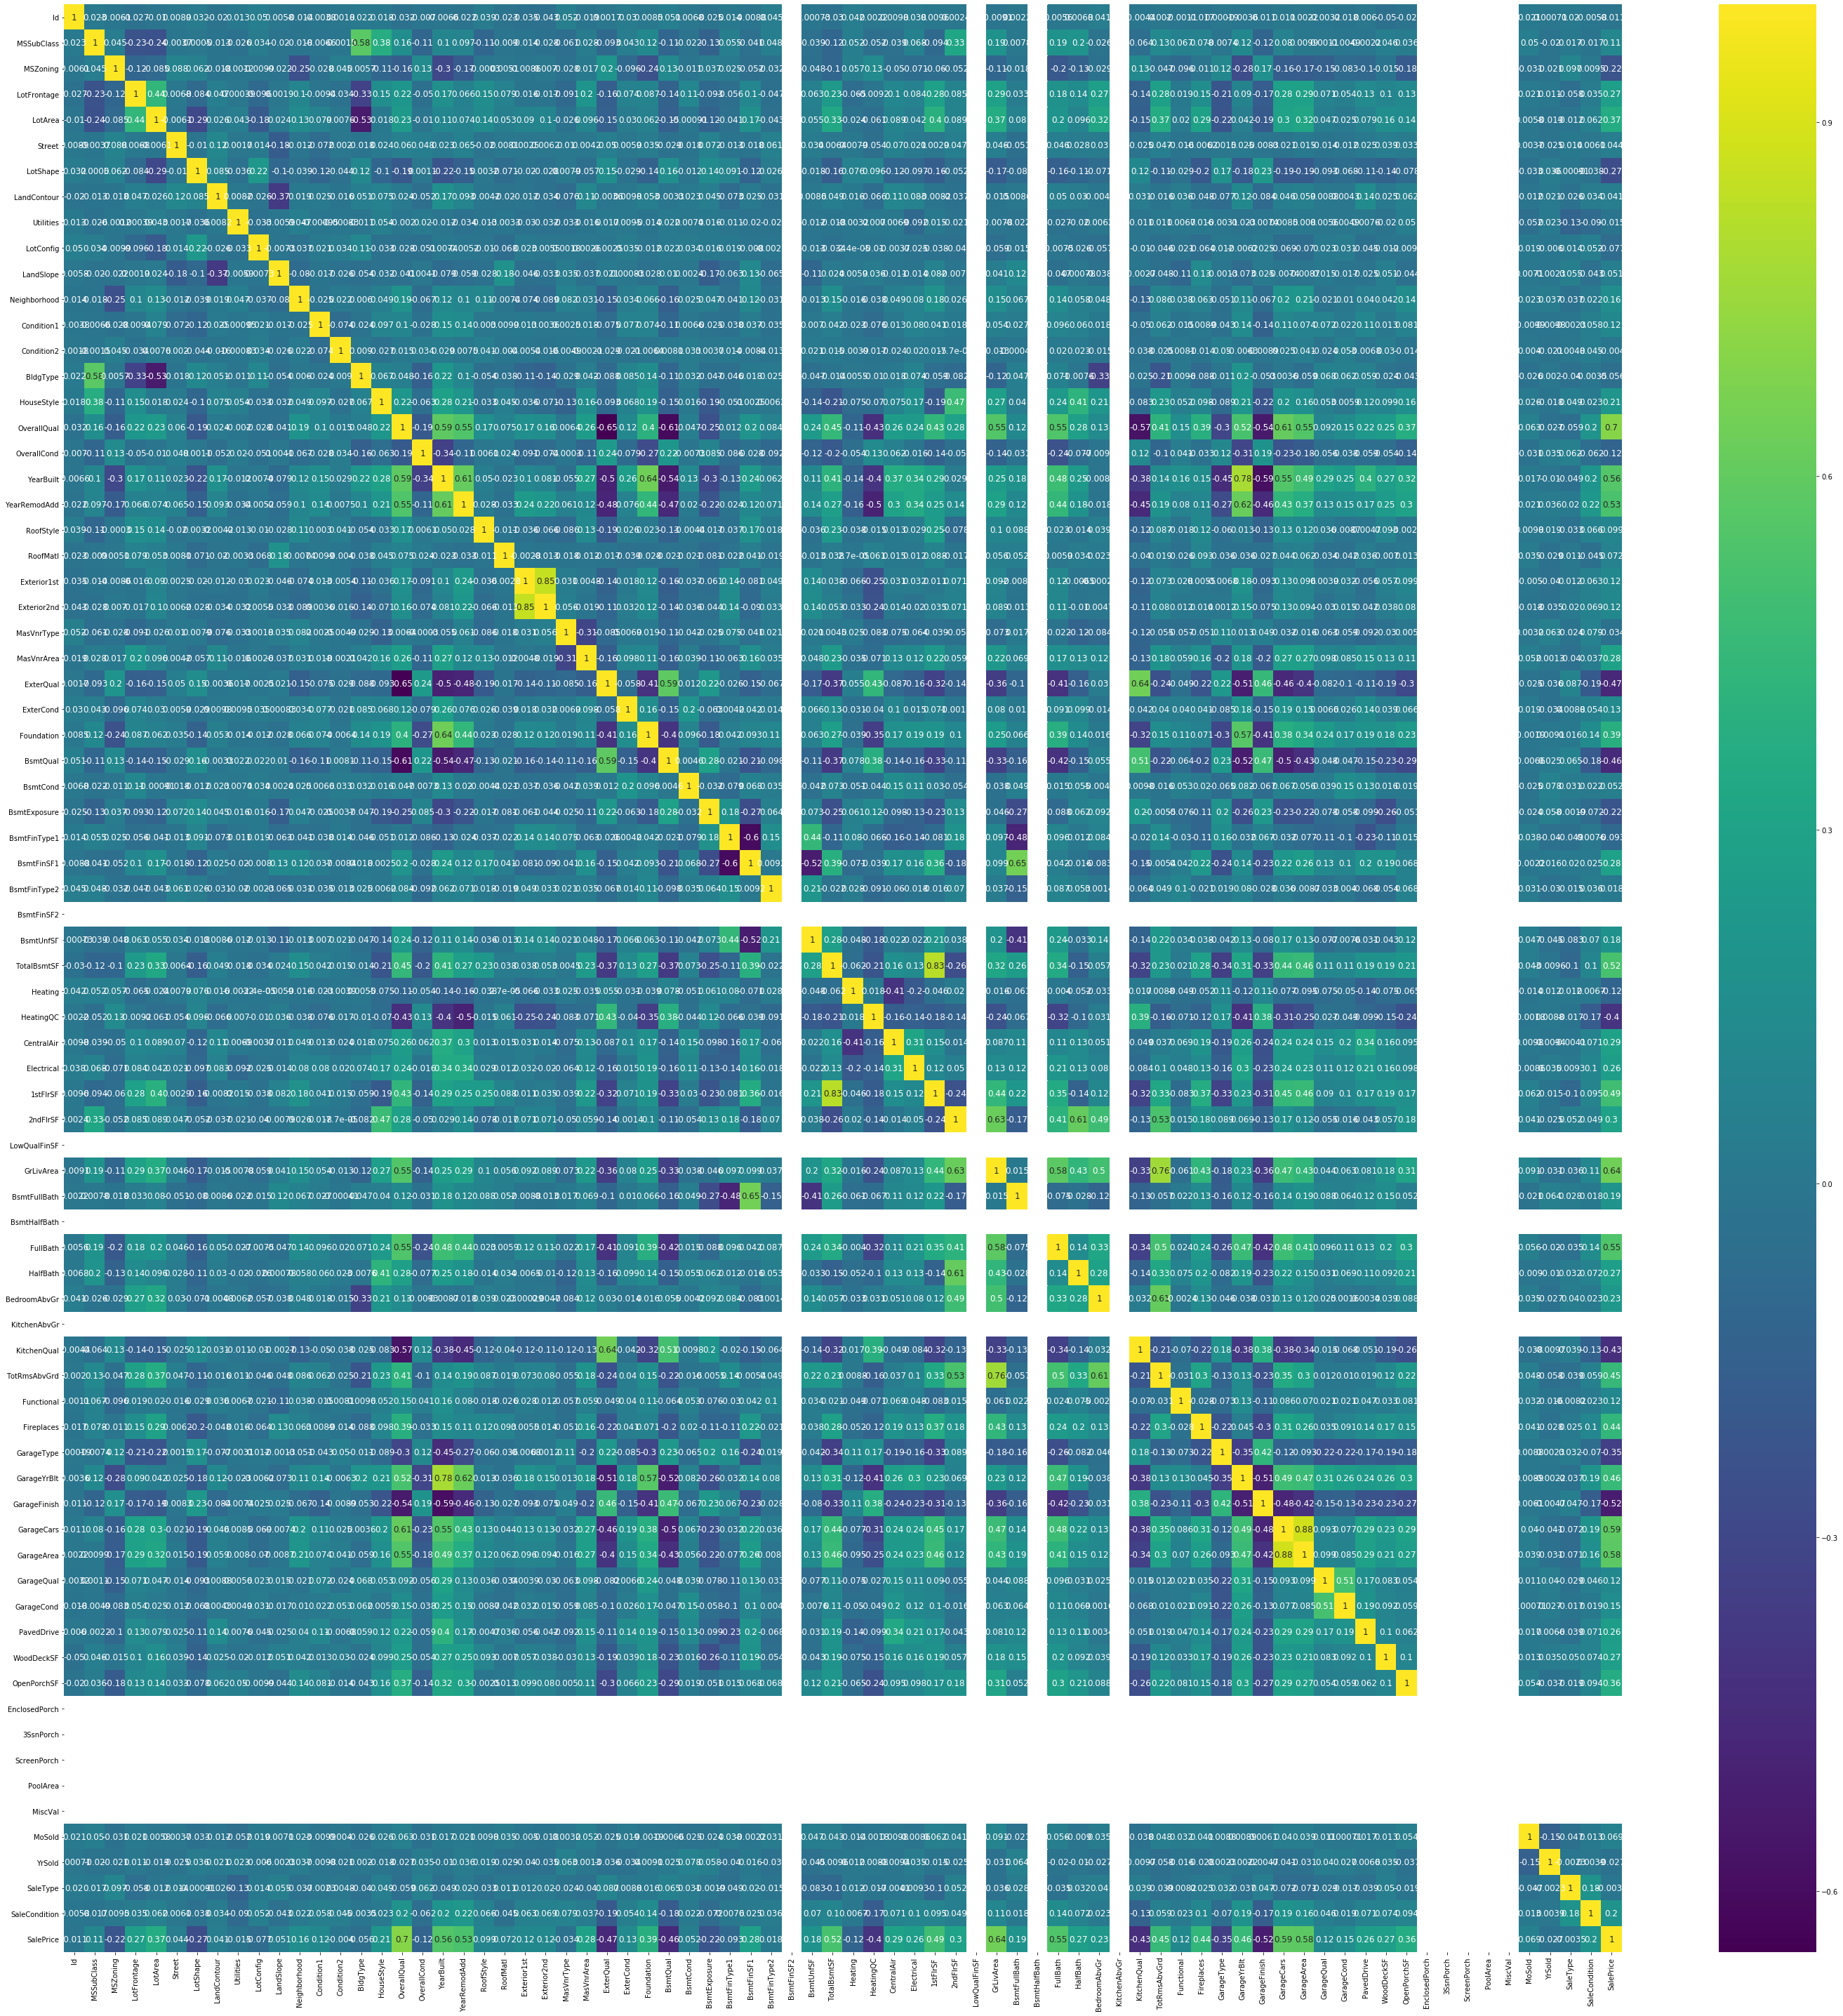

In [24]:
figsize = (40,40)
PlotUtil.draw_correlation_heatmap(train_df,figsize)
plt.tight_layout()

### Feature Selection

In [29]:
selected_features = FeatureSelectionUtil.correlated_features(train_df,target_variable,.50)
selected_features

,Correlation Values
OverallQual,0.697877
YearBuilt,0.556647
YearRemodAdd,0.525288
TotalBsmtSF,0.519806
GrLivArea,0.640551
FullBath,0.545586
GarageFinish,-0.517759
GarageCars,0.590731
GarageArea,0.581248
SalePrice,1.000000
